In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, how='inner', on='Mouse ID')
# Display the data table for preview
#combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
#mouse_metadata.tail()

In [ ]:
#study_results.head()

In [ ]:
#combined_df["Mouse ID"].unique()

In [2]:
# Checking the number of mice.
#unique mice IDs
Num_mice = len(combined_df["Mouse ID"].unique())
Num_mice
#checking the amount of times a mice ID shows up.
#combined_df["Mouse ID"].value_counts()

249

In [3]:
mice_frequency = combined_df[["Mouse ID", "Timepoint"]].value_counts()
mice_frequency

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [4]:
#Get all the data for the duplicate mouse ID. 
duplicated_df = combined_df.loc[(combined_df["Mouse ID"] == "g989"), :]
duplicated_df

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[(combined_df["Mouse ID"] != "g989"), :]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_group = clean_df.groupby("Drug Regimen")

mean_summary = summary_group["Tumor Volume (mm3)"].mean()
median_summary = summary_group["Tumor Volume (mm3)"].median()
variance_summary = summary_group["Tumor Volume (mm3)"].var()
std_summary = summary_group["Tumor Volume (mm3)"].std()
sem_summary = summary_group["Tumor Volume (mm3)"].sem()


summary_df = pd.DataFrame({"mean tumor volume": mean_summary,
                           "median tumor volume": median_summary,
                           "varinace tumor volume": variance_summary,
                           "tumor volume std": std_summary,
                           "tumor volume sem": sem_summary})



In [8]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_arg = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_arg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


<AxesSubplot:title={'center':'Total Timepoints by Drug Regimen'}, xlabel='Drug Regimen'>

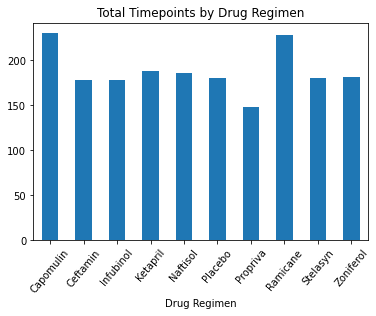

In [9]:
#Bar and Pie Charts
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug
#regimen using Pandas.

drug_regimen = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()).reset_index()

#filter the neccessary columns
drug_filtered = drug_regimen[["Drug Regimen", "Timepoint"]]

drug_filtered = drug_filtered.set_index("Drug Regimen")
drug_filtered.plot(title = "Total Timepoints by Drug Regimen", kind = "bar", legend = False, rot =50)


In [10]:
clean_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [11]:
#Create the array of the number of mice that each drug have
num_mice = (clean_df.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()

Text(0.5, 0, 'Drugs')

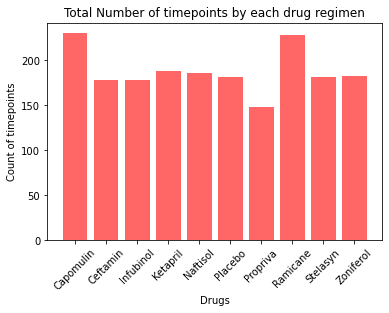

In [12]:
#Generate a bar plot showing the total number of timepoints for all mice tested for each drug
#regimen using pyplot.
x_axis = np.arange(len(drug_filtered))
plt.bar(x_axis, num_mice, color="r", alpha = 0.6, align = "center")

#Create tick locations assigned to the name for x_axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = 45)
#plt.xticks(rotation = 45)

#create descriptive labels
plt.title("Total Number of timepoints by each drug regimen")
plt.ylabel("Count of timepoints")
plt.xlabel("Drugs")

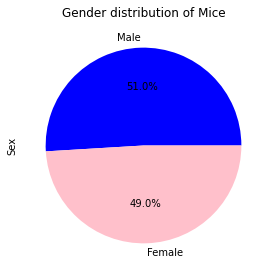

In [13]:
#Generate two pie plots. Both plots should be identical and show the distribution of 
#female or male mice in the study.
colors = ["Blue", "Pink"]
#Create the first pie plot by using both Pandas's DataFrame.plot().
gender_pie = clean_df["Sex"].value_counts()
gender_pie.plot.pie(title = "Gender distribution of Mice", autopct = "%1.1f%%", figsize = (4.5,4.5), colors = colors)
plt.show()

<Figure size 720x720 with 0 Axes>

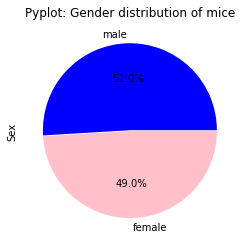

<Figure size 720x720 with 0 Axes>

In [14]:
#Create the second pie plot by using Matplotlib's pyplot methods.

#create variables for attributes in plt.pie function
colors = ["blue", "pink"]
explode = 0.01, 0
labels = ["male", "female"]
plt.pie(gender_pie, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%")
plt.title("Pyplot: Gender distribution of mice")
plt.ylabel("Sex")
plt.figure(figsize = (10,10))

In [ ]:
#Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") |
             (clean_df["Drug Regimen"] == "Ramicane") |
             (clean_df["Drug Regimen"] == "Infubinol") |
             (clean_df["Drug Regimen"] == "Ceftamin"), :]

In [16]:
four_drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [24]:
# Start by getting the last (greatest) timepoint for each mouse
max_time = four_drugs.groupby("Mouse ID")["Timepoint"].max()

#create a df for max_time in order to merge it with four_drugs_df
max_time = max_time.reset_index()


#merger max_time with four drug df
df3 = max_time.merge(four_drugs, on=["Mouse ID", "Timepoint"], how = "left")
df3

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

for x in treatments:
    tumor_data = df3.loc[df3["Drug Regimen"] == x, "Tumor Volume (mm3)"]
    
    #add subset
    tumor_list.append(tumor_data)
    
    #Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumor_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    #Now calculate bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq - (1.5*iqr)
    outliers = tumor_data.loc[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    
    #Determine outliers by using the upper and lower bounds, and then print the results.
    print(f"{x}'s potential outliers: {outliers}")


Ramicane's potential outliers: 3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
50    30.564625
54    31.095335
62    45.220869
63    36.561652
66    37.225650
67    43.419381
71    30.276232
77    40.667713
87    43.166373
94    44.183451
98    30.638696
Name: Tumor Volume (mm3), dtype: float64
Capomulin's potential outliers: 9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
53    33.329098
64    46.539206
65    32.377357
68    41.581521
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
96    31.896238
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: 0     67.973419
1     65.525743
6     57.031862
8     66.083066
14    72.226731
15    3

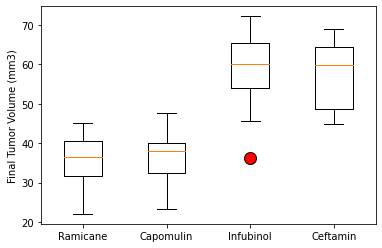

In [53]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_list, labels = treatments,flierprops=outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

In [37]:
# Line and Scatter Plots

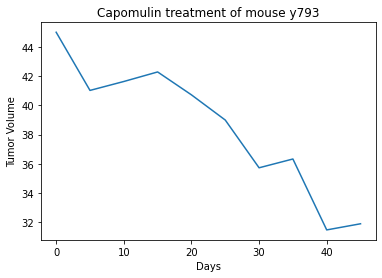

In [44]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "y793"]

plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Days")
plt.ylabel("Tumor Volume")
plt.title("Capomulin treatment of mouse y793")
plt.show()

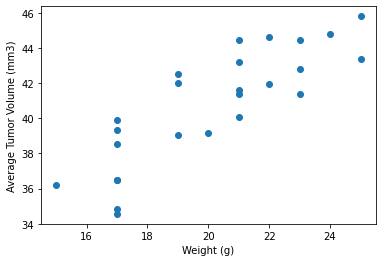

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mean = capomulin_df.groupby (["Mouse ID"]).mean()

plt.scatter(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [47]:
#Correlation Regression

The correlation between weight and the average tumor volume is 0.84


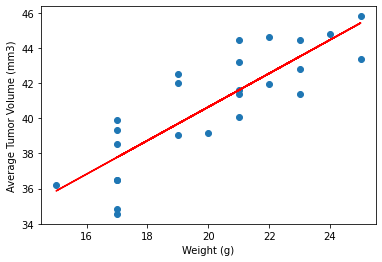

In [49]:
#Calculate the correlation coefficient and linear regression model for
#mouse weight and average tumor volume for the Capomulin regimen  
corr_coefficient = round(st.pearsonr(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between weight and the average tumor volume is {corr_coefficient}")
regression = st.linregress(capomulin_mean['Weight (g)'],capomulin_mean['Tumor Volume (mm3)'])


y_values = capomulin_mean['Weight (g)'] * regression[0] + regression[1]
plt.scatter(capomulin_mean['Weight (g)'], capomulin_mean['Tumor Volume (mm3)'])
plt.plot(capomulin_mean['Weight (g)'], y_values, color = "red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()